In [2]:
import time
import os

import dotenv
import pydot
import requests
import numpy as np
import pandas as pd
import ctypes
import shutil
import multiprocessing
import multiprocessing.sharedctypes as sharedctypes
import os.path
import ast
import librosa, librosa.display

import IPython.display as ipd
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from tempfile import mktemp
from pydub import AudioSegment
from scipy.io import wavfile
import keras
import matplotlib.pyplot as plt
from IPython.display import Audio

from music_plots import *

np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
tracks_df = load("data/tracks.csv")
genres_df = load("data/genres.csv")
echonest_df = load("data/echonest.csv")
#features_df = load("data/features.csv")

In [4]:
#tracks_df[tracks_df['track_id']==6606]
#tracks2_df.head()
print(tracks_df.columns)
tracks_df.head()

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                                           \
                                        information listens producer tags   
track_id                                                                    
2                                           <p></p>    6073      NaN   []   
3                                           <p></p>    6073      NaN   []   
5                                           <p></p>    6073      NaN   []   
10                                              NaN   47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>    2710      NaN   []   

          ...       track                         \
          ... information interest language_code   
track_id  ...                                      
2         ...         NaN     4656            en   
3         ...         NaN     1470            en   
5         ...         NaN     1933            en   
10        ...         NaN    54881            en   
20        ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [29]:
genres_df.loc[12]

#tracks      32923
parent           0
title         Rock
top_level       12
Name: 12, dtype: object

In [32]:
genres_df[genres_df['parent']==0]

#tracks  parent                title  top_level
genre_id                                                 
2            5271       0        International          2
3            1752       0                Blues          3
4            4126       0                 Jazz          4
5            4106       0            Classical          5
8             868       0  Old-Time / Historic          8
9            1987       0              Country          9
10          13845       0                  Pop         10
12          32923       0                 Rock         12
13            730       0       Easy Listening         13
14           1499       0             Soul-RnB         14
15          34413       0           Electronic         15
17          12706       0                 Folk         17
20           1876       0               Spoken         20
21           8389       0              Hip-Hop         21
38          38154       0         Experimental         38
1235        14938       0         Instrumental       1235

In [5]:
print(echonest_df.columns)
echonest_df.head()

MultiIndex([('echonest',    'audio_features',     'acousticness'),
            ('echonest',    'audio_features',     'danceability'),
            ('echonest',    'audio_features',           'energy'),
            ('echonest',    'audio_features', 'instrumentalness'),
            ('echonest',    'audio_features',         'liveness'),
            ('echonest',    'audio_features',      'speechiness'),
            ('echonest',    'audio_features',            'tempo'),
            ('echonest',    'audio_features',          'valence'),
            ('echonest',          'metadata',       'album_date'),
            ('echonest',          'metadata',       'album_name'),
            ...
            ('echonest', 'temporal_features',              '214'),
            ('echonest', 'temporal_features',              '215'),
            ('echonest', 'temporal_features',              '216'),
            ('echonest', 'temporal_features',              '217'),
            ('echonest', 'temporal_features', 

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [ ]:
print(features_df.columns)
features_df.head()

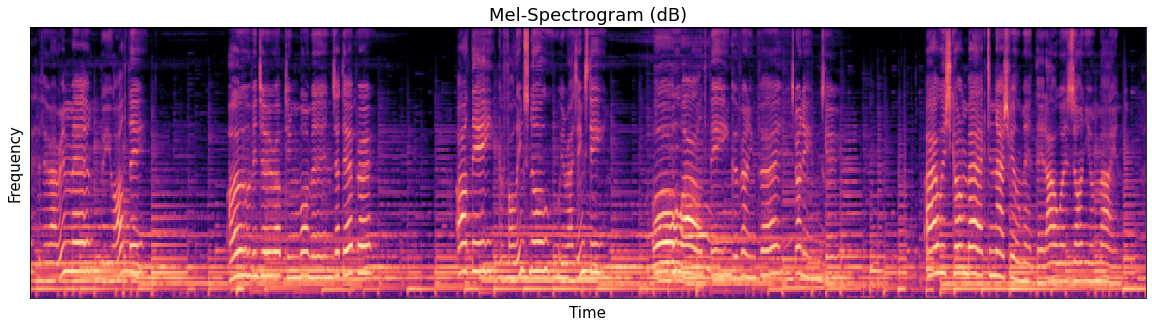

In [8]:
plot_mel_spectrogram('data/tracks_wav/127266.wav')

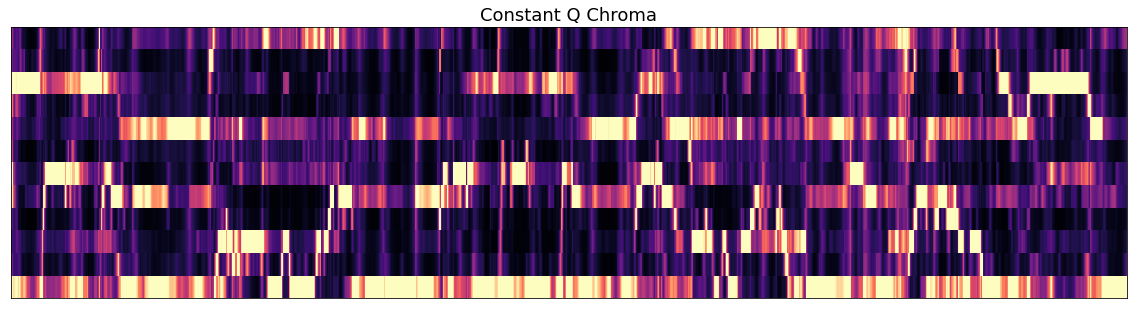

In [9]:
plot_chroma('data/tracks_wav/127266.wav')

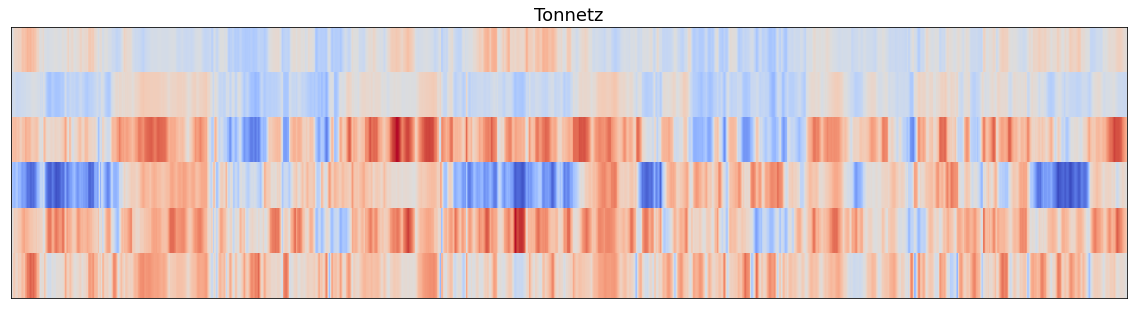

In [10]:
plot_tonnetz('data/tracks_wav/127266.wav')

/Users/daniele/PycharmProjects/ML/music_plots.py:23: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03241264 -0.02648086
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(signal, sr=sr)


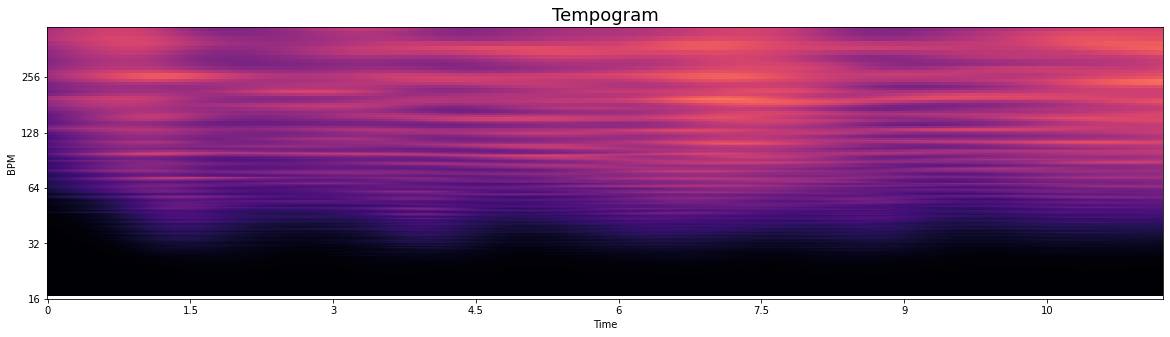

In [11]:
plot_tempogram('data/tracks_wav/127266.wav')

In [1]:
generate_mel_spectrogram('data/tracks_wav/127266.wav')

NameError: name 'generate_mel_spectrogram' is not defined

In [20]:
from utils import get_features

import time

start = time.time()
x = get_features(['data/tracks_wav/127266.wav', 'data/tracks_wav/000002.wav'])
end = time.time()
print(end - start)

display(x)
x.to_csv('out.csv')

features_tm = pd.read_csv('out.csv', index_col=0, header=[0, 1, 2])
display(features_tm)

2.226064920425415


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
0            -0.605912 -0.803135 -0.385421 -0.486602  0.018416  0.403369   
1            -0.217179 -0.726627 -0.491414 -0.721757 -0.545637  0.909584   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
0           2.367104  1.111748  0.032254  0.577222  ...  0.151173  0.078696   
1           0.786965  0.917240 -0.793050  0.452531  ...  0.102472  0.029663   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
0           0.054672  26.758322  0.239746  0.029737  0.022949  0.005371   
1           0.037664   3.497347  0.416504  0.098369  0.078613  0.006348   

feature                         
statistics      skew       std  
number            01        01  
0           4.539645  0.025977  
1           1.825639  0.068398  

[2 rows x 518 columns]

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
0            -0.605912 -0.803135 -0.385421 -0.486602  0.018416  0.403369   
1            -0.217179 -0.726627 -0.491414 -0.721757 -0.545637  0.909584   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
0           2.367104  1.111748  0.032254  0.577222  ...  0.151173  0.078696   
1           0.786965  0.917240 -0.793050  0.452531  ...  0.102472  0.029663   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
0           0.054672  26.758322  0.239746  0.029737  0.022949  0.005371   
1           0.037664   3.497347  0.416504  0.098369  0.078613  0.006348   

feature                         
statistics      skew       std  
number            01        01  
0           4.539645  0.025977  
1           1.825639  0.068398  

[2 rows x 518 columns]

In [70]:
features_df = pd.read_csv('new_features.csv', index_col=0, header=[0, 1, 2])
display(features_df)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
6608         -0.514136  0.102025  3.211623 -0.409699  2.310633 -0.624384   
98550        -0.888496 -0.543275 -0.268409  2.081209 -0.176785 -0.039511   
98236         7.571894  0.799434  0.338393 -0.840908 -0.586132  0.280276   
147126       -0.953074 -0.437103 -0.010938 -1.316950 -0.836699  1.241229   
4779         -0.866279 -0.287412 -0.647487  0.316349 -0.000807  0.165982   
...                ...       ...       ...       ...       ...       ...   
119725       -0.281480 -0.637733  0.593827 -0.005050 -0.721143 -0.232277   
98549        -0.710265 -0.405176 -0.252436 -0.445528 -0.263628 -0.032077   
131917       -0.543134 -0.008171 -0.314506 -0.880054  0.129443 -1.029797   
6611         -0.777327 -0.837879  0.140058 -0.289560 -0.713159  0.290365   
51991        -0.263679 -0.394670 -0.364069 -0.696705 -1.144195 -0.838824   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
6608       -0.490104 -0.467654 -0.326958 -0.707326  ...  0.134904  0.041301   
98550       1.264057  2.085742 -0.238240 -0.797922  ...  0.128017  0.040760   
98236      -0.735879 -0.386995 -0.195639 -1.112090  ...  0.067507  0.026138   
147126      2.933952  0.486668  1.840397  4.451793  ...  0.206924  0.080330   
4779       -0.396568 -0.555789  0.213659 -0.419588  ...  0.139869  0.039593   
...              ...       ...       ...       ...  ...       ...       ...   
119725     -0.340328  0.610787  1.124747  0.084618  ...  0.100658  0.031662   
98549       0.442745  0.342770  3.655493  1.776285  ...  0.144739  0.038135   
131917     -0.325549 -0.341389 -0.299172 -1.079364  ...  0.203034  0.069247   
6611        0.386784 -0.347761  2.499937  0.757803  ...  0.106074  0.039008   
51991      -0.786097  2.458862  2.432818 -0.969633  ...  0.231761  0.052110   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
6608        0.055328  10.324201  0.373535  0.065738  0.056152  0.007812   
98550       0.052715   0.809276  0.449219  0.151485  0.141602  0.010742   
98236       0.021610  -0.197926  0.029297  0.015841  0.015625  0.005859   
147126      0.094053   8.920524  0.119141  0.016191  0.013672  0.001953   
4779        0.042502   2.248410  0.201660  0.058082  0.056152  0.010254   
...              ...        ...       ...       ...       ...       ...   
119725      0.043944  18.474745  0.272461  0.045331  0.043457  0.002930   
98549       0.045694   0.159378  0.323730  0.119189  0.110352  0.002441   
131917      0.066808   0.087486  0.053223  0.024084  0.022949  0.008789   
6611        0.046695   8.874200  0.288574  0.061133  0.053711  0.006348   
51991       0.046990   1.405643  0.314941  0.073302  0.056152  0.003906   

feature                         
statistics      skew       std  
number            01        01  
6608        2.651123  0.043814  
98550       0.968062  0.078302  
98236       0.254955  0.003936  
147126      2.413915  0.012465  
4779        0.999470  0.022155  
...              ...       ...  
119725      3.457297  0.031024  
98549       0.542414  0.053406  
131917      0.711797  0.007247  
6611        2.445617  0.035670  
51991       1.385214  0.060200  

[7847 rows x 518 columns]

In [7]:
import seaborn as sns

track_genres = tracks_df.xs('track', level=0, axis=1)['genre_top'].loc[features_df.dropna().index]
track_genres = track_genres.dropna()
features_df = features_df.loc[track_genres.index]

features_df['genre'] = track_genres.values
#df = pd.join([features_df, track_genres], axis=1)
features_df

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
6608         -0.514136  0.102025  3.211623 -0.409699  2.310633 -0.624384   
98550        -0.888496 -0.543275 -0.268409  2.081209 -0.176785 -0.039511   
98236         7.571894  0.799434  0.338393 -0.840908 -0.586132  0.280276   
147126       -0.953074 -0.437103 -0.010938 -1.316950 -0.836699  1.241229   
4779         -0.866279 -0.287412 -0.647487  0.316349 -0.000807  0.165982   
...                ...       ...       ...       ...       ...       ...   
119725       -0.281480 -0.637733  0.593827 -0.005050 -0.721143 -0.232277   
98549        -0.710265 -0.405176 -0.252436 -0.445528 -0.263628 -0.032077   
131917       -0.543134 -0.008171 -0.314506 -0.880054  0.129443 -1.029797   
6611         -0.777327 -0.837879  0.140058 -0.289560 -0.713159  0.290365   
51991        -0.263679 -0.394670 -0.364069 -0.696705 -1.144195 -0.838824   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        05        06   
6608       -0.490104 -0.467654 -0.326958 -0.707326  ...  0.041301  0.055328   
98550       1.264057  2.085742 -0.238240 -0.797922  ...  0.040760  0.052715   
98236      -0.735879 -0.386995 -0.195639 -1.112090  ...  0.026138  0.021610   
147126      2.933952  0.486668  1.840397  4.451793  ...  0.080330  0.094053   
4779       -0.396568 -0.555789  0.213659 -0.419588  ...  0.039593  0.042502   
...              ...       ...       ...       ...  ...       ...       ...   
119725     -0.340328  0.610787  1.124747  0.084618  ...  0.031662  0.043944   
98549       0.442745  0.342770  3.655493  1.776285  ...  0.038135  0.045694   
131917     -0.325549 -0.341389 -0.299172 -1.079364  ...  0.069247  0.066808   
6611        0.386784 -0.347761  2.499937  0.757803  ...  0.039008  0.046695   
51991      -0.786097  2.458862  2.432818 -0.969633  ...  0.052110  0.046990   

feature           zcr                                                    \
statistics   kurtosis       max      mean    median       min      skew   
number             01        01        01        01        01        01   
6608        10.324201  0.373535  0.065738  0.056152  0.007812  2.651123   
98550        0.809276  0.449219  0.151485  0.141602  0.010742  0.968062   
98236       -0.197926  0.029297  0.015841  0.015625  0.005859  0.254955   
147126       8.920524  0.119141  0.016191  0.013672  0.001953  2.413915   
4779         2.248410  0.201660  0.058082  0.056152  0.010254  0.999470   
...               ...       ...       ...       ...       ...       ...   
119725      18.474745  0.272461  0.045331  0.043457  0.002930  3.457297   
98549        0.159378  0.323730  0.119189  0.110352  0.002441  0.542414   
131917       0.087486  0.053223  0.024084  0.022949  0.008789  0.711797   
6611         8.874200  0.288574  0.061133  0.053711  0.006348  2.445617   
51991        1.405643  0.314941  0.073302  0.056152  0.003906  1.385214   

feature                       genre  
statistics       std                 
number            01                 
6608        0.043814        Hip-Hop  
98550       0.078302        Hip-Hop  
98236       0.003936   Instrumental  
147126      0.012465   Instrumental  
4779        0.022155           Rock  
...              ...            ...  
119725      0.031024           Folk  
98549       0.053406        Hip-Hop  
131917      0.007247   Instrumental  
6611        0.035670        Hip-Hop  
51991       0.060200  International  

[7841 rows x 519 columns]

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

df2 = pd.DataFrame(pca.fit_transform(features_df), index=features_df.index)

df3 = pd.concat([df2, track_genres], axis=1)
display(df3)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

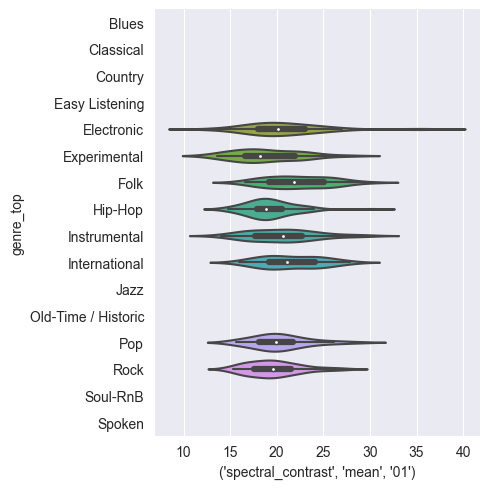

In [26]:
sns.catplot(x=('spectral_contrast', 'mean', '01'), y="genre_top", kind="violin", data=df.iloc[:300])

0it [00:00, ?it/s]

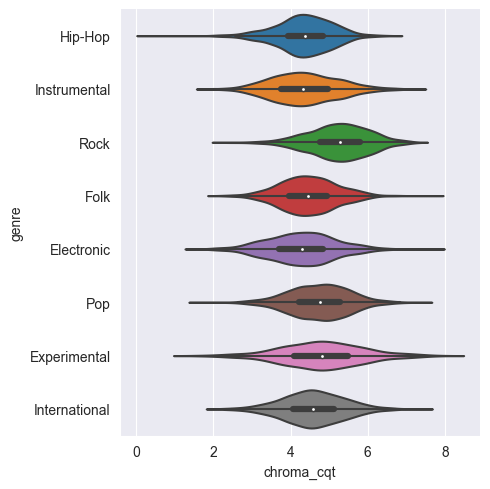

In [104]:
mean_df = pd.DataFrame(columns=["chroma_cqt", 'genre'])

target = 'mean'
for i in tqdm(features_df.iterrows()):
    x = i[1]['chroma_cqt', target].sum()
    mean_df.loc[i[0]] = [x, i[1]['genre'][0]]

mean_df

sns.catplot(x='chroma_cqt', y="genre", kind="violin", data=mean_df)

In [8]:

features_df.isna().any()

feature      statistics  number
chroma_cens  kurtosis    01         True
                         02         True
                         03         True
                         04         True
                         05         True
                                   ...  
zcr          mean        01        False
             median      01        False
             min         01        False
             skew        01        False
             std         01        False
Length: 518, dtype: bool

In [20]:
features_df.isnull().sum(axis = 0)

feature      statistics  number
chroma_cens  kurtosis    01        2
                         02        2
                         03        2
                         04        2
                         05        2
                                  ..
zcr          mean        01        0
             median      01        0
             min         01        0
             skew        01        0
             std         01        0
Length: 518, dtype: int64

In [12]:
features_df[features_df.isna().any(axis=1)]

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
132567        8.886270 -1.414148 -0.863564 -1.491122  5.415106  1.714882   
38880        -0.543963  0.140875 -0.058026  0.714167  0.166571 -0.275367   
105719       -0.923114 -0.815079 -0.571728 -0.433651 -0.369833  1.145267   
98567              NaN       NaN       NaN       NaN       NaN       NaN   
107535             NaN       NaN       NaN       NaN       NaN       NaN   
69002         0.585960  0.261052  0.284908 -0.021662 -0.206454 -0.044749   

feature                                               ...   tonnetz            \
statistics                                            ...       std             
number            07        08         09         10  ...        04        05   
132567      4.799457  1.320694  -0.877420  -0.697034  ...  0.150592  0.083992   
38880       0.078154 -0.054806  -0.478200   1.870654  ...  0.057027  0.023077   
105719     -0.877119 -1.176432  -0.680055   0.907306  ...  0.081169  0.031749   
98567            NaN       NaN        NaN        NaN  ...       NaN       NaN   
107535           NaN       NaN        NaN        NaN  ...       NaN       NaN   
69002      -0.441261  6.662327  19.752533  53.921280  ...  0.075644  0.026490   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
132567      0.146248   9.529501  0.019043  0.003209  0.002930  0.000977   
38880       0.022789   4.557822  0.043457  0.007097  0.005859  0.000488   
105719      0.043327   2.536167  0.018555  0.003385  0.002930  0.000000   
98567            NaN   2.209920  0.041992  0.036066  0.037354  0.019043   
107535           NaN  22.027853  0.002930  0.000067  0.000000  0.000000   
69002       0.032230   9.105909  0.058105  0.005238  0.003418  0.000000   

feature                         
statistics      skew       std  
number            01        01  
132567      2.166500  0.001608  
38880       1.724214  0.005626  
105719      1.218001  0.002510  
98567      -1.339104  0.004693  
107535      4.285109  0.000262  
69002       2.453628  0.005928  

[6 rows x 518 columns]

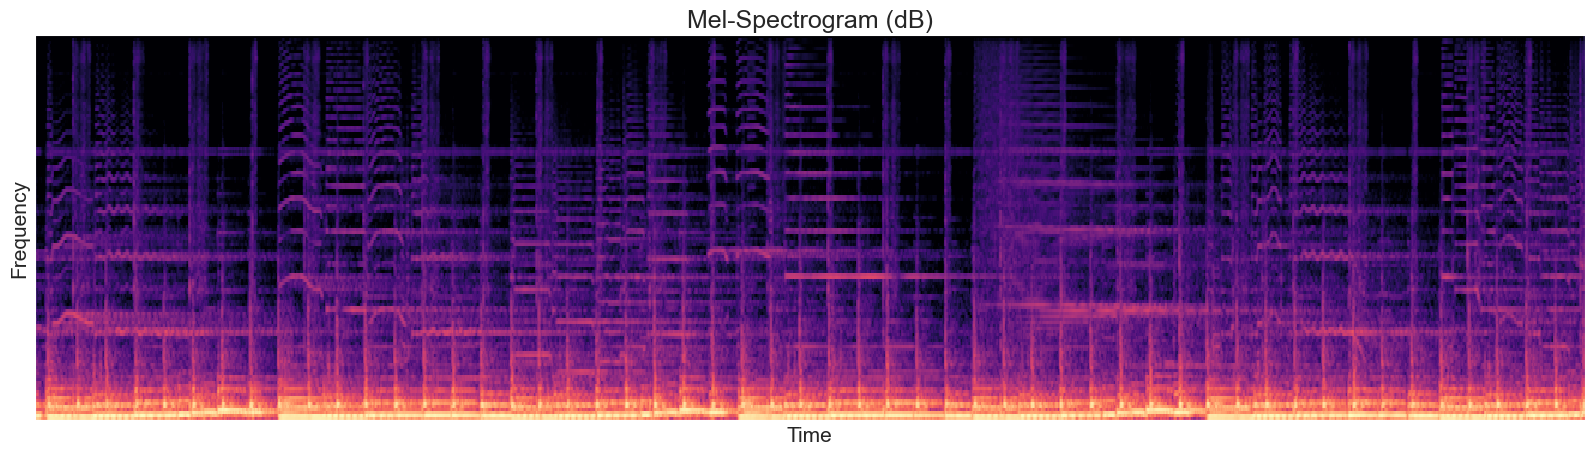

In [13]:
plot_mel_spectrogram('data/tracks_wav/132567.wav')

In [21]:
features_df = pd.read_csv('new_features.csv', index_col=0, header=[0, 1, 2])
features_df = features_df.dropna()
display(features_df)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
6608         -0.514136  0.102025  3.211623 -0.409699  2.310633 -0.624384   
98550        -0.888496 -0.543275 -0.268409  2.081209 -0.176785 -0.039511   
98236         7.571894  0.799434  0.338393 -0.840908 -0.586132  0.280276   
147126       -0.953074 -0.437103 -0.010938 -1.316950 -0.836699  1.241229   
4779         -0.866279 -0.287412 -0.647487  0.316349 -0.000807  0.165982   
...                ...       ...       ...       ...       ...       ...   
119725       -0.281480 -0.637733  0.593827 -0.005050 -0.721143 -0.232277   
98549        -0.710265 -0.405176 -0.252436 -0.445528 -0.263628 -0.032077   
131917       -0.543134 -0.008171 -0.314506 -0.880054  0.129443 -1.029797   
6611         -0.777327 -0.837879  0.140058 -0.289560 -0.713159  0.290365   
51991        -0.263679 -0.394670 -0.364069 -0.696705 -1.144195 -0.838824   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
6608       -0.490104 -0.467654 -0.326958 -0.707326  ...  0.134904  0.041301   
98550       1.264057  2.085742 -0.238240 -0.797922  ...  0.128017  0.040760   
98236      -0.735879 -0.386995 -0.195639 -1.112090  ...  0.067507  0.026138   
147126      2.933952  0.486668  1.840397  4.451793  ...  0.206924  0.080330   
4779       -0.396568 -0.555789  0.213659 -0.419588  ...  0.139869  0.039593   
...              ...       ...       ...       ...  ...       ...       ...   
119725     -0.340328  0.610787  1.124747  0.084618  ...  0.100658  0.031662   
98549       0.442745  0.342770  3.655493  1.776285  ...  0.144739  0.038135   
131917     -0.325549 -0.341389 -0.299172 -1.079364  ...  0.203034  0.069247   
6611        0.386784 -0.347761  2.499937  0.757803  ...  0.106074  0.039008   
51991      -0.786097  2.458862  2.432818 -0.969633  ...  0.231761  0.052110   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
6608        0.055328  10.324201  0.373535  0.065738  0.056152  0.007812   
98550       0.052715   0.809276  0.449219  0.151485  0.141602  0.010742   
98236       0.021610  -0.197926  0.029297  0.015841  0.015625  0.005859   
147126      0.094053   8.920524  0.119141  0.016191  0.013672  0.001953   
4779        0.042502   2.248410  0.201660  0.058082  0.056152  0.010254   
...              ...        ...       ...       ...       ...       ...   
119725      0.043944  18.474745  0.272461  0.045331  0.043457  0.002930   
98549       0.045694   0.159378  0.323730  0.119189  0.110352  0.002441   
131917      0.066808   0.087486  0.053223  0.024084  0.022949  0.008789   
6611        0.046695   8.874200  0.288574  0.061133  0.053711  0.006348   
51991       0.046990   1.405643  0.314941  0.073302  0.056152  0.003906   

feature                         
statistics      skew       std  
number            01        01  
6608        2.651123  0.043814  
98550       0.968062  0.078302  
98236       0.254955  0.003936  
147126      2.413915  0.012465  
4779        0.999470  0.022155  
...              ...       ...  
119725      3.457297  0.031024  
98549       0.542414  0.053406  
131917      0.711797  0.007247  
6611        2.445617  0.035670  
51991       1.385214  0.060200  

[7841 rows x 518 columns]

In [40]:
features_genres_df = features_df.loc[:, :]
features_genres_df = pd.concat([features_genres_df, track_genres], axis=1)
#x.columns = x.columns.map('_'.join)
display(features_genres_df)

chroma_cens_kurtosis_01  chroma_cens_kurtosis_02  \
6608                  -0.514136                 0.102025   
98550                 -0.888496                -0.543275   
98236                  7.571894                 0.799434   
147126                -0.953074                -0.437103   
4779                  -0.866279                -0.287412   
...                         ...                      ...   
119725                -0.281480                -0.637733   
98549                 -0.710265                -0.405176   
131917                -0.543134                -0.008171   
6611                  -0.777327                -0.837879   
51991                 -0.263679                -0.394670   

        chroma_cens_kurtosis_03  chroma_cens_kurtosis_04  \
6608                   3.211623                -0.409699   
98550                 -0.268409                 2.081209   
98236                  0.338393                -0.840908   
147126                -0.010938                -1.316950   
4779                  -0.647487                 0.316349   
...                         ...                      ...   
119725                 0.593827                -0.005050   
98549                 -0.252436                -0.445528   
131917                -0.314506                -0.880054   
6611                   0.140058                -0.289560   
51991                 -0.364069                -0.696705   

        chroma_cens_kurtosis_05  chroma_cens_kurtosis_06  \
6608                   2.310633                -0.624384   
98550                 -0.176785                -0.039511   
98236                 -0.586132                 0.280276   
147126                -0.836699                 1.241229   
4779                  -0.000807                 0.165982   
...                         ...                      ...   
119725                -0.721143                -0.232277   
98549                 -0.263628                -0.032077   
131917                 0.129443                -1.029797   
6611                  -0.713159                 0.290365   
51991                 -1.144195                -0.838824   

        chroma_cens_kurtosis_07  chroma_cens_kurtosis_08  \
6608                  -0.490104                -0.467654   
98550                  1.264057                 2.085742   
98236                 -0.735879                -0.386995   
147126                 2.933952                 0.486668   
4779                  -0.396568                -0.555789   
...                         ...                      ...   
119725                -0.340328                 0.610787   
98549                  0.442745                 0.342770   
131917                -0.325549                -0.341389   
6611                   0.386784                -0.347761   
51991                 -0.786097                 2.458862   

        chroma_cens_kurtosis_09  chroma_cens_kurtosis_10  ...  tonnetz_std_05  \
6608                  -0.326958                -0.707326  ...        0.041301   
98550                 -0.238240                -0.797922  ...        0.040760   
98236                 -0.195639                -1.112090  ...        0.026138   
147126                 1.840397                 4.451793  ...        0.080330   
4779                   0.213659                -0.419588  ...        0.039593   
...                         ...                      ...  ...             ...   
119725                 1.124747                 0.084618  ...        0.031662   
98549                  3.655493                 1.776285  ...        0.038135   
131917                -0.299172                -1.079364  ...        0.069247   
6611                   2.499937                 0.757803  ...        0.039008   
51991                  2.432818                -0.969633  ...        0.052110   

        tonnetz_std_06  zcr_kurtosis_01  zcr_max_01  zcr_mean_01  \
6608          0.055328        10.324201    0.373535     0.065738   
98550         0

In [31]:
x = features_df.loc[:, ('mfcc', 'mean', slice('01', '05'))]

x.columns = x.columns.map('_'.join)
x = pd.concat([x, track_genres], axis=1)

x

mfcc_mean_01  mfcc_mean_02  mfcc_mean_03  mfcc_mean_04  mfcc_mean_05  \
6608     -169.495790    154.859510    -48.146126     57.684467    -14.989718   
98550     -12.578237     88.946144    -42.400223     38.546420    -34.008053   
98236    -188.689680    229.829740      7.197523     13.932585     -6.119154   
147126   -290.090600    168.267820     18.896790     19.536705     30.189238   
4779     -126.911380    143.553120    -31.884365     41.481735      5.755575   
...              ...           ...           ...           ...           ...   
119725   -124.198875    156.146620    -30.985071     32.207325      4.500409   
98549      -9.075475     91.740040    -46.165745     47.360218    -24.263403   
131917   -308.941860    218.165130     40.655277    -10.579397      2.791532   
6611     -154.479430    156.726410    -56.973476     64.955850     -5.919655   
51991    -206.455630    130.802080    -29.439380     16.343245     -7.503572   

            genre_top  
6608          Hip-Hop  
98550         Hip-Hop  
98236    Instrumental  
147126   Instrumental  
4779             Rock  
...               ...  
119725           Folk  
98549         Hip-Hop  
131917   Instrumental  
6611          Hip-Hop  
51991   International  

[7841 rows x 6 columns]

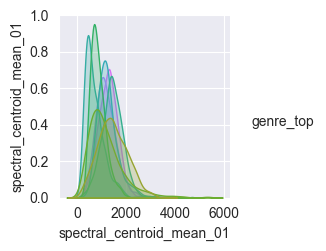

In [30]:
sns.pairplot(x, hue='genre_top')

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

df2 = pd.DataFrame(pca.fit_transform(features_df), index=features_df.index)

df3 = pd.concat([df2, track_genres], axis=1)
display(df3)

0            1           2           3           4  \
6608     600.934977   450.085079 -152.315613  709.159809  209.048869   
98550   4349.529695  2255.884734  307.555676  762.441820  161.383759   
98236  -4345.730934    79.583770  318.901413  -76.859215  113.493968   
147126   710.504286 -3263.223998  630.882042 -281.262221 -165.782119   
4779    1524.260774  -379.458714  417.337827 -193.824317   46.513112   
...             ...          ...         ...         ...         ...   
119725  -342.979800   -13.145244  193.915823  256.790424   16.270469   
98549   2708.958567  3080.415972  592.814462  422.861782  159.680025   
131917 -6457.748810  1337.306098 -627.139753  284.502673  -86.102410   
6611     213.219818   526.258650  -69.807452  829.113486  274.775291   
51991   1794.982757  -522.102465 -378.419204  444.180107 -547.462764   

                 5           6           7           8           9  \
6608     53.796208  148.547264    7.276916   20.799503  -47.581203   
98550  -235.735566   40.862902 -165.508789  138.315027  158.237401   
98236   461.933323  332.702747 -378.423665   25.812893   86.673107   
147126 -398.651493  230.483585  -38.716512 -267.996360  181.310197   
4779    -66.755004  -75.476446  -56.885239   62.352250   53.990641   
...            ...         ...         ...         ...         ...   
119725  159.802240 -256.211497 -109.305863   65.460080   15.469350   
98549  -143.154311   54.431791    4.347713  206.681941   39.548512   
131917 -138.563331   25.663139   67.279284  -71.777277   -2.496985   
6611    119.847312  -21.787144   20.909737  -28.384807   12.308907   
51991  -414.451950  -75.460552  130.692588   67.740875  142.287269   

            genre_top  
6608          Hip-Hop  
98550         Hip-Hop  
98236    Instrumental  
147126   Instrumental  
4779             Rock  
...               ...  
119725           Folk  
98549         Hip-Hop  
131917   Instrumental  
6611          Hip-Hop  
51991   International  

[7841 rows x 11 columns]

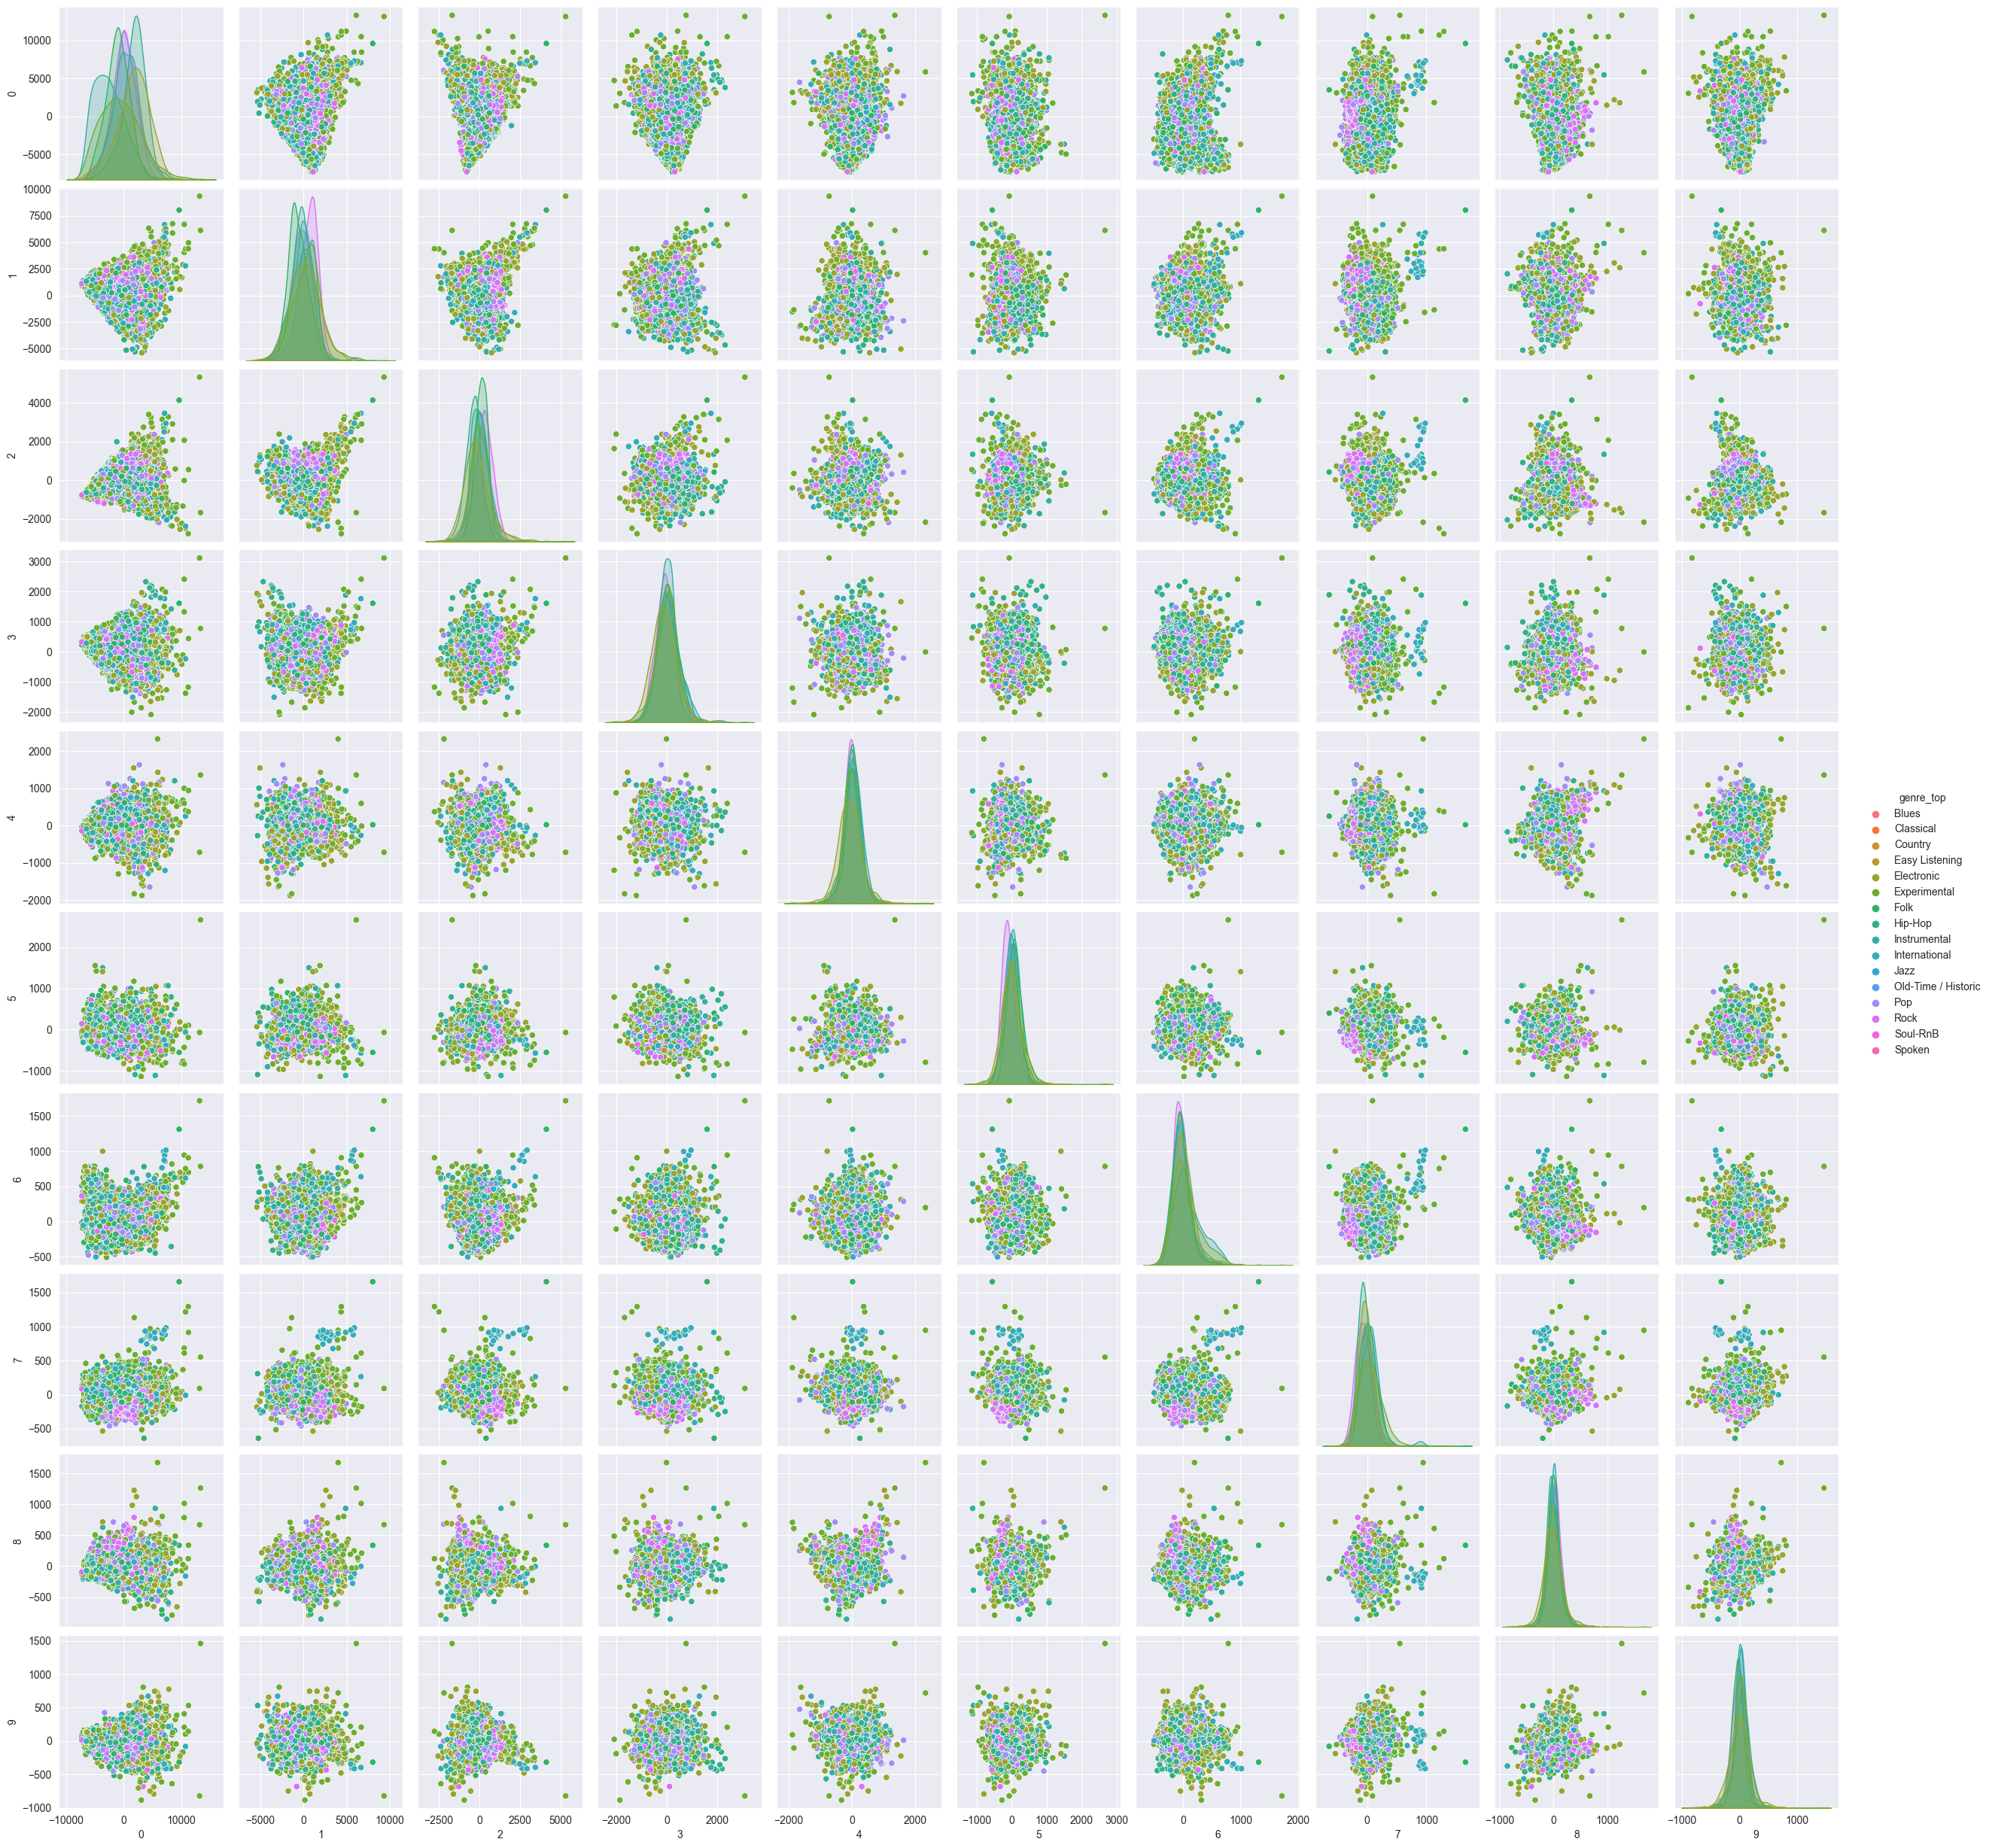

In [25]:
sns.pairplot(df3, hue='genre_top')

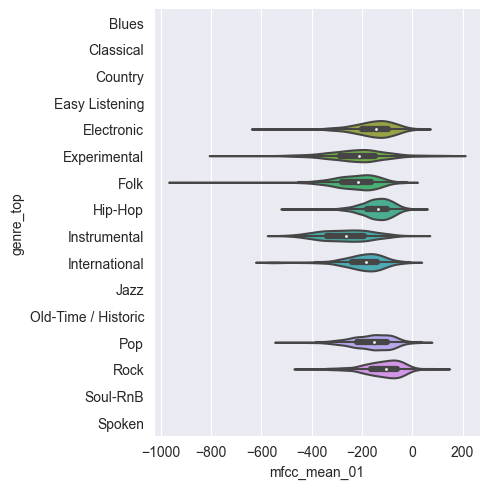

In [46]:
sns.catplot(x='mfcc_mean_01', y="genre_top", kind="violin", data=features_genres_df)


In [51]:
# 132567,105719
import utils

files = np.char.add('data/tracks_wav/',['132567.wav', '003880.wav', '105719.wav'])
#files = files[:100]

x = utils.get_features(files)

display(x)

x.isnull().sum(axis = 0)
#x.to_csv('new_features.csv')

 33%|███▎      | 1/3 [00:00<00:01,  1.58it/s]

10: UserWarning('Trying to estimate tuning from empty frequency set.')


100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

10: UserWarning('Trying to estimate tuning from empty frequency set.')


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
132567        8.886270 -1.414148 -0.863564 -1.491122  5.415106  1.714882   
3880          0.505609 -0.765287  2.163132 -0.926650 -0.645470 -0.737660   
105719       -0.923114 -0.815079 -0.571728 -0.433651 -0.369833  1.145267   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
132567      4.799457  1.320694 -0.877419 -0.697034  ...  0.150592  0.083992   
3880       -0.122322  1.653749  0.039270 -0.418108  ...  0.152455  0.048647   
105719     -0.877119 -1.176432 -0.680055  0.907306  ...  0.081169  0.031749   

feature                    zcr                                          \
statistics            kurtosis       max      mean    median       min   
number            06        01        01        01        01        01   
132567      0.146248  9.529501  0.019043  0.003209  0.002930  0.000977   
3880        0.052298 -0.784869  0.128906  0.057749  0.053711  0.008301   
105719      0.043327  2.536167  0.018555  0.003385  0.002930  0.000000   

feature                         
statistics      skew       std  
number            01        01  
132567      2.166500  0.001608  
3880        0.376823  0.025321  
105719      1.218001  0.002510  

[3 rows x 518 columns]

feature      statistics  number
chroma_cens  kurtosis    01        0
                         02        0
                         03        0
                         04        0
                         05        0
                                  ..
zcr          mean        01        0
             median      01        0
             min         01        0
             skew        01        0
             std         01        0
Length: 518, dtype: int64

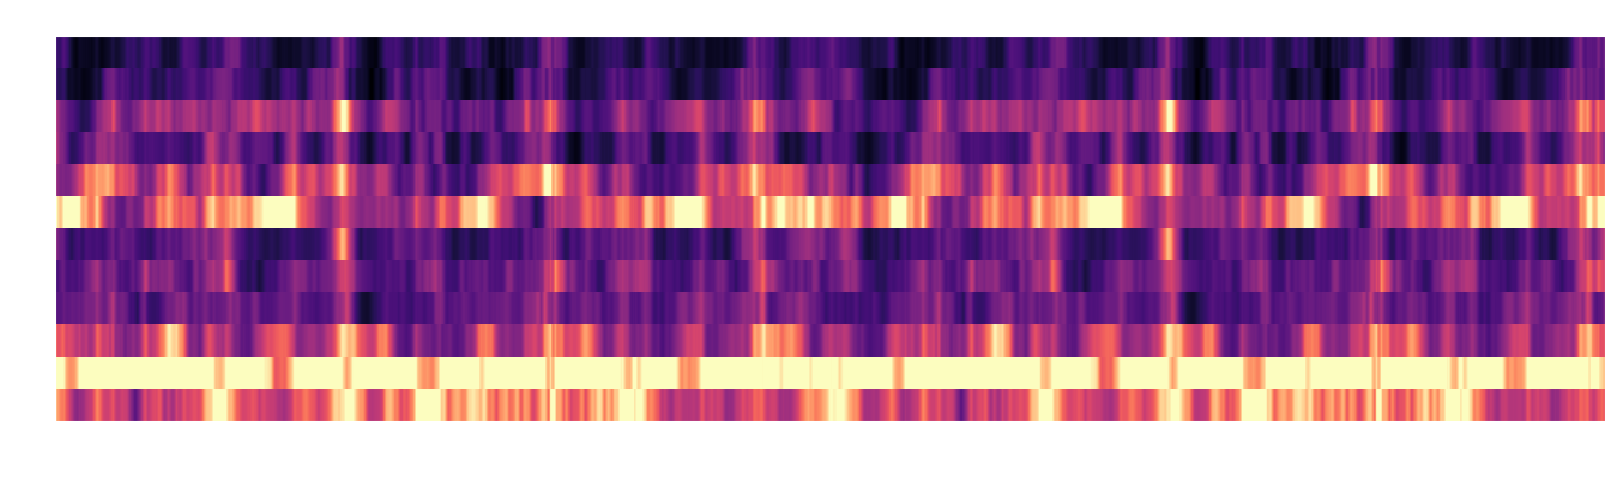

In [52]:
plot_chroma('data/tracks_wav/105719.wav')